<a href="https://colab.research.google.com/github/Manish-Kumar950407/Telecom-Customer-Churn-Prediction/blob/main/C_A_6_Telecom_Customer_Churn_Prediction_Complete_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Customer Churn Prediction

Customer churn (also known as customer attrition) is the loss of client or customers over a specific period. Companies such as Netflix, Sky, O2, Insurance Providers, etc., often use customer churn rates as one of their key business metrics as the cost of retaining an existing customer is far less than acquiring a new one.

There are two main types of churn: voluntary and involuntary. Voluntary churn occurs due to a decision by the customer to switch to another provider, whereas involuntary churn occurs due to circumstances beyond the customers/provider control (death, relocation, etc.). In most cases, involuntary churn is excluded for the analytical models. Analysts tend to focus on voluntary reasons because it typically occurs due to factors related to the company (customer relation, billing, satisfaction, etc.).

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small list of customers likely to churn, customer retention market strategies focusing on these customers can be put in place.

Retention Rate is an indication of how good is your product market fit (PMF). If your PMF is not satisfactory, you should see your customers churning very soon. One of the powerful tools to improve Retention Rate (hence the PMF) is Churn Prediction. By using this technique, you can easily find out who is likely to churn in the given period.

# Problem Statement

Imagine yourself as a freelance data scientist ready for the next project adventure. Your task is to select a machine learning project from the list provided or propose an original project idea that resonates with you. Your objective is to identify a specific challenge within the chosen industry domain and design a machine-learning solution to address it. Whether you're predicting customer behavior, optimizing processes, or making healthcare more efficient, your project should demonstrate your ability to approach complex problems, preprocess and analyze relevant data, develop and fine-tune models, and interpret results in a meaningful way. Your project will be a testament to your adaptability, curiosity, and aptitude for machine learning.


#Dataset Link -

https://drive.google.com/file/d/1APZdNLuI7d-h7s0t4qH9dNU0yaIysSUO/view?usp=sharing

# ***Let's Begin !***

> # Telecom Customer Churn Prediction

## 1. Know Your Data

### Importing Libraries

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:
# Importing libraries

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
import sys

# Data Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from catboost import Pool as pool
from catboost import cv
from catboost.utils import get_roc_curve, get_confusion_matrix
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve
from catboost.utils import select_threshold
from xgboost import XGBClassifier
from xgboost import plot_importance


# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# import Hyperopt
import hyperopt
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/TelcoChurn.csv')

### Dataset First View

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Dataset's type

In [ ]:
print("Dataset's Type : ",type(df))

Dataset's Type :  <class 'pandas.core.frame.DataFrame'>


### Dataset's list of column names

In [ ]:
print("List of names of all columns in the Dataset : ",df.columns)

List of names of all columns in the Dataset :  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("The Shape of the Dataset : ",df.shape)

The Shape of the Dataset :  (7043, 21)


### Size of Dataset

In [ ]:
print("Size of Dataframe before preprocessing :- ", sys.getsizeof(df))

Size of Dataframe before preprocessing :-  8166491


### Dataset Information

In [ ]:
# Dataset Info
print("The detailed Information about the Dataset : \n")
df.info()

The detailed Information about the Dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 


### Duplicate Values

In [ ]:
print("The total number of duplicated values about the Dataset : ",df.duplicated().sum())

The total number of duplicated values about the Dataset :  0


### Missing Values/Null Values

* Let's confirm whether there are any missing values:

In [ ]:
# Missing Values/Null Values Count
print("The total number of missing values for every column of the Dataset : \n")
df.isnull().sum()

The total number of missing values for every column of the Dataset : 



,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 2. Understanding Your Variables

### Dataset's list of columns

In [ ]:
# Dataset Columns
print("List of names of all columns in the Dataset : \n")
df.columns

List of names of all columns in the Dataset : 



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* Let's create lists for the attributes:

In [ ]:
all_att = list(df.columns)
num_att = list(df._get_numeric_data().columns)
cat_att = list(df.select_dtypes(include=['object']).columns)
print('Numerical Attributes:' + '\n {}'.format(num_att))
print("\n")
print('Categorical Attributes:' + '\n {}'.format(cat_att))

Numerical Attributes:
 ['SeniorCitizen', 'tenure', 'MonthlyCharges']


Categorical Attributes:
 ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


* Let's verify the unique values for each categorical attribute:

In [ ]:
for col in cat_att:
    print(col + ': ')
    print('Unique values: {}'.format(df[col].nunique()))
    print(df[col].value_counts())
    print('\n')

customerID: 
Unique values: 7043
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender: 
Unique values: 2
gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: 
Unique values: 2
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: 
Unique values: 2
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: 
Unique values: 2
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: 
Unique values: 3
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService: 
Unique values: 3
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity: 
Unique values: 3
OnlineSecurity
No                     3498
Yes 

* We can notice from the cell above that the columns "TotalCharges" should be a numerical one. Let's investigate why it has been picked up as an object rather than number. Let's first get an overview of the numerical attributes:

### Dataset's Description

In [ ]:
# Dataset Describe
print("The detailed description of the dataset : \n")
df.describe()

The detailed description of the dataset : 



,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 3. Data Wrangling

* Let's verify if there are hidden empty values in the 'TotalCharges' column:

In [ ]:
df[df['TotalCharges']==" "]['TotalCharges'].value_counts()

,count
TotalCharges,
,11


* Indeed, there are. There are 11 observations that are empty and were masked with a space in its cell, reason why pandas did not pick it up as nan. Let's replace it by a real nan.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

* Let's confirm that we have now true null values:

In [ ]:
df['TotalCharges'].isna().sum()

11

* Since we have only 11 empty observations in the 'TotalCharges' column (a very small number of missing data), These rows will be deleted from the dataset rather them imputing them.

In [ ]:
df_1 = df.copy()
df_1 = df_1[df_1['TotalCharges'].notnull()]

In [ ]:
df_1 = df_1.reset_index()[df_1.columns]
df_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


* Now let's convert 'TotalCharges' to float:

In [ ]:
df_1['TotalCharges'] = df_1['TotalCharges'].astype(float)
df_1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


* The column 'SeniorCitizen' seems to be an object masked as a numerical variable. Let's deal with that:

In [ ]:
df_1['SeniorCitizen'] = df['SeniorCitizen'].replace({1:"Yes", 0:"No"})
df_1['SeniorCitizen']

,SeniorCitizen
0,No
1,No
2,No
3,No
4,No
...,...
7027,No
7028,No
7029,Yes
7030,No


* Let's update our attributes lists:

In [ ]:
all_att = list(df_1.columns)
num_att = list(df_1._get_numeric_data().columns)
cat_att = list(df_1.select_dtypes(include=['object']).columns)
print('Numerical Attributes:' + '\n {}'.format(num_att))
print("\n")
print('Categorical Attributes:' + '\n {}'.format(cat_att))

Numerical Attributes:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


Categorical Attributes:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
temp_list = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in temp_list:
    df_1[col] = df_1[col].replace({"No internet service":"No"})

In [ ]:
for col in cat_att:
    print(col + ":")
    print(df_1[col].value_counts())
    print('\n')

customerID:
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64


gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64


SeniorCitizen:
SeniorCitizen
No     5892
Yes    1140
Name: count, dtype: int64


Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64


Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64


PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64


MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


OnlineSecurity:
OnlineSecurity
No     5017
Yes    2015
Name: count, dtype: int64


OnlineBackup:
OnlineBackup
No     4607
Yes    

In [ ]:
def tenure_bands(df):
    if df['tenure'] <= 12:
        return "Tenure_0-12"
    elif (df['tenure'] > 12) & (df['tenure'] <= 24):
        return "Tenure_13-24"
    elif (df['tenure'] > 24) & (df['tenure'] <= 48):
        return "Tenure_25-48"
    elif (df['tenure'] > 48) & (df['tenure'] <= 60):
        return "Tenure_49-60"
    elif df['tenure'] > 60:
        return "Tenure_gt_60"

In [ ]:
df_2 = df_1.copy()
df_2['tenure_group'] = df_2.apply(lambda telcom_2:tenure_bands(telcom_2), axis=1)
df_2['tenure_group']

,tenure_group
0,Tenure_0-12
1,Tenure_25-48
2,Tenure_0-12
3,Tenure_25-48
4,Tenure_0-12
...,...
7027,Tenure_13-24
7028,Tenure_gt_60
7029,Tenure_0-12
7030,Tenure_0-12


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
all_att = list(df_2.columns)
num_att = list(df_2._get_numeric_data().columns)
cat_att = list(df_2.select_dtypes(include=['object']).columns)

id_col = ['customerID']
target = ['Churn']
cat_att = [x for x in cat_att if x not in id_col + target]

print('Numerical Attributes:' + '\n {}'.format(num_att))
print("\n")
print('Categorical Attributes:' + '\n {}'.format(cat_att))

Numerical Attributes:
 ['tenure', 'MonthlyCharges', 'TotalCharges']


Categorical Attributes:
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']


## 4. Exploratory Data Analysis (Data Visualization ,Storytelling & Experimenting with charts : Understand the relationships between variables)

In [ ]:
labels = df_2['Churn'].value_counts().keys().tolist()
values = df_2['Churn'].value_counts().values.tolist()

### Customer Churn Overview

The Pie Chart for Customer Churn Overview :



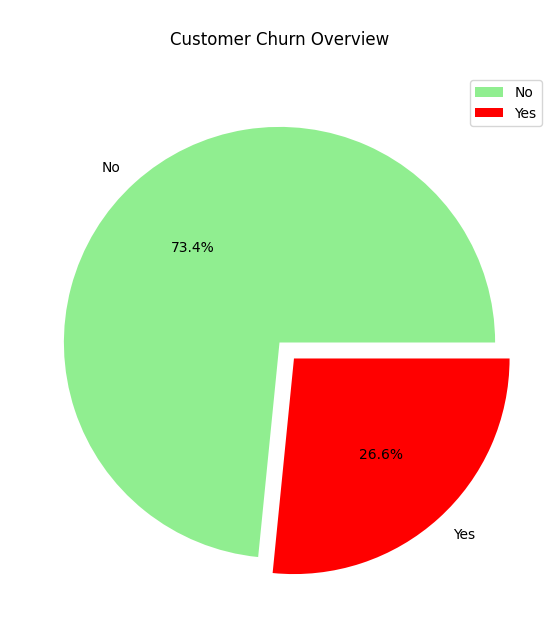

In [ ]:
print("The Pie Chart for Customer Churn Overview :\n")
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(values,
        labels=labels,
        explode=(0,0.1),
        autopct='%1.1f%%',
        colors=['lightgreen', 'red'])
plt.legend()
plt.title('\nCustomer Churn Overview\n')
plt.show()

### Churn Distribution based on Gender

The Bar Plot of Churn Distribution by Gender :



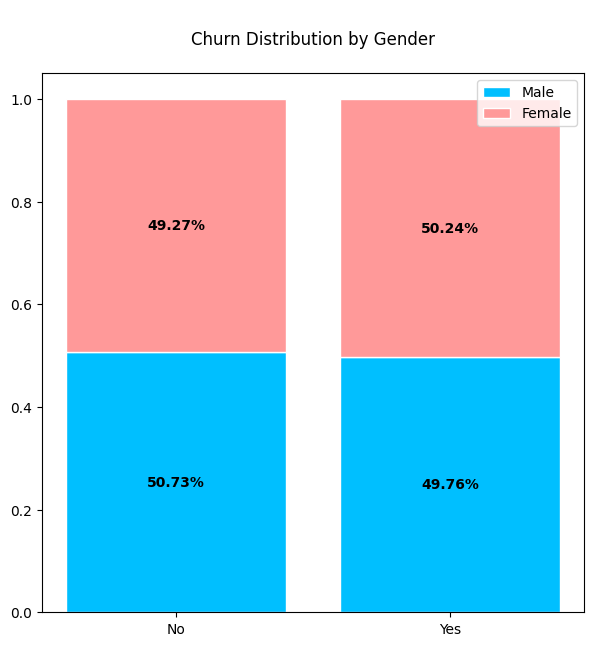

In [ ]:
no_churn = ((df_2[df_2['Churn']=='No']['gender'].value_counts())
            /(df_2[df_2['Churn']=='No']['gender'].value_counts().sum()))
yes_churn = ((df_2[df_2['Churn']=='Yes']['gender'].value_counts())
            /(df_2[df_2['Churn']=='Yes']['gender'].value_counts().sum()))

# Getting values from the group and categories
x_labels = df_2['Churn'].value_counts().keys().tolist()
male = [no_churn['Male'], yes_churn['Male']]
female = [no_churn['Female'], yes_churn['Female']]

# Plotting bars
print("The Bar Plot of Churn Distribution by Gender :\n")
barWidth = 0.8
plt.figure(figsize=(7,7))
ax1 = plt.bar(x_labels, male, color='#00BFFF', label='Male',
              edgecolor='white', width=barWidth)
ax2 = plt.bar(x_labels, female, bottom=male, color='#FF9999', label='Female',
              edgecolor='white', width=barWidth)
plt.legend()
plt.title('\nChurn Distribution by Gender\n')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')

plt.show()

### Gender Distribution, SeniorCitizen Distribution, Partner Distribution, Dependents Distribution

<ipython-input-36-2d11aa21fe1c>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


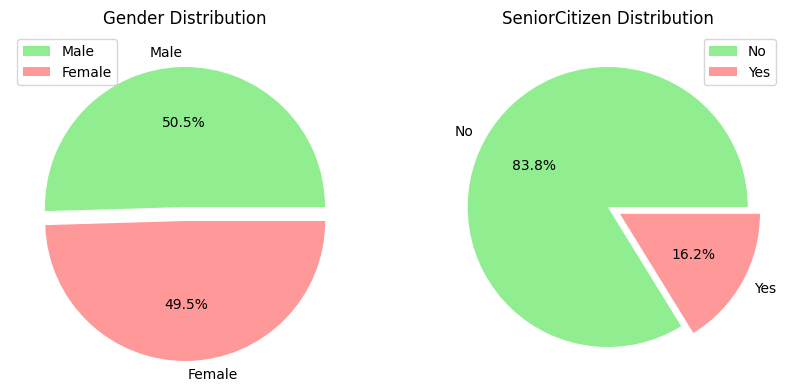

<ipython-input-36-2d11aa21fe1c>:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(223)


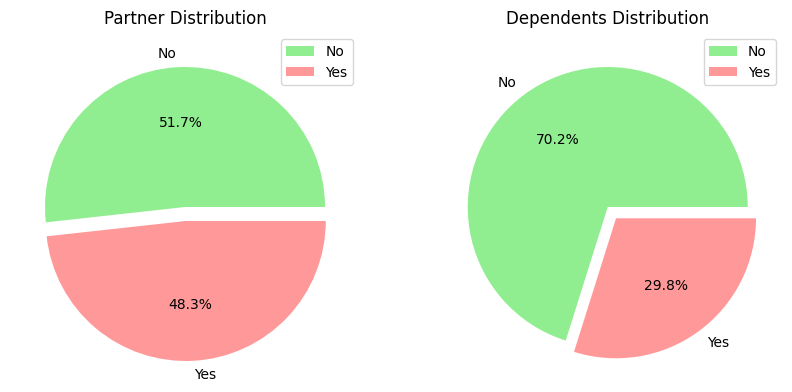

In [ ]:
labels = df_2['gender'].value_counts().keys().tolist()
values = df_2['gender'].value_counts().values.tolist()

plt.subplots(figsize=(10,10))

plt.subplot(221)
plt.pie(values,
       labels=labels,
       explode=(0,0.1),
       autopct='%1.1f%%',
       colors=['lightgreen', '#FF9999'])

plt.legend()
plt.title('Gender Distribution')

labels = df_2['SeniorCitizen'].value_counts().keys().tolist()
values = df_2['SeniorCitizen'].value_counts().values.tolist()

plt.subplot(222)
plt.pie(values,
       labels=labels,
       explode=(0,0.1),
       autopct='%1.1f%%',
       colors=['lightgreen', '#FF9999'])

plt.legend()
plt.title('SeniorCitizen Distribution')
plt.show()

labels = df_2['Partner'].value_counts().keys().tolist()
values = df_2['Partner'].value_counts().values.tolist()

plt.subplots(figsize=(10,10))
plt.subplot(223)
plt.pie(values,
       labels=labels,
       explode=(0,0.1),
       autopct='%1.1f%%',
       colors=['lightgreen', '#FF9999'])

plt.legend()
plt.title('Partner Distribution')


labels = df_2['Dependents'].value_counts().keys().tolist()
values = df_2['Dependents'].value_counts().values.tolist()

plt.subplot(224)
plt.pie(values,
       labels=labels,
       explode=(0,0.1),
       autopct='%1.1f%%',
       colors=['lightgreen', '#FF9999'])

plt.legend()
plt.title('Dependents Distribution')
plt.show()

### Bar Plots of Churn Distribution by Variables

In [ ]:
def y_n_churn_var_distribution(col_name):

    no_churn = ((df_2[df_2['Churn']=='No'][col_name].value_counts())
                /(df_2[df_2['Churn']=='No'][col_name].value_counts().sum()))
    yes_churn = ((df_2[df_2['Churn']=='Yes'][col_name].value_counts())
                /(df_2[df_2['Churn']=='Yes'][col_name].value_counts().sum()))

    # Getting values from the group and categories
    x_labels = df_2['Churn'].value_counts().keys().tolist()
    n_var = [no_churn['No'], yes_churn['No']]
    y_var = [no_churn['Yes'], yes_churn['Yes']]

    # Plotting bars
    barWidth = 0.8
    plt.figure(figsize=(7,7))
    ax1 = plt.bar(x_labels, n_var, color='#00BFFF',
                  label=('No ' + col_name), edgecolor='white', width=barWidth)
    ax2 = plt.bar(x_labels, y_var, bottom=n_var, color='lightgreen',
                  label=('Yes ' + col_name), edgecolor='white', width=barWidth)
    plt.legend()
    plt.title('\nChurn Distribution by ' + col_name + '\n')

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
                ha='center', va='center', color='black', fontweight='bold')
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
                ha='center', va='center', color='black', fontweight='bold')

    plt.show()

#### 1. Bar Plot of Churn Distribution by 'SeniorCitizen'

Bar Plot of Churn Distribution by 'SeniorCitizen' :



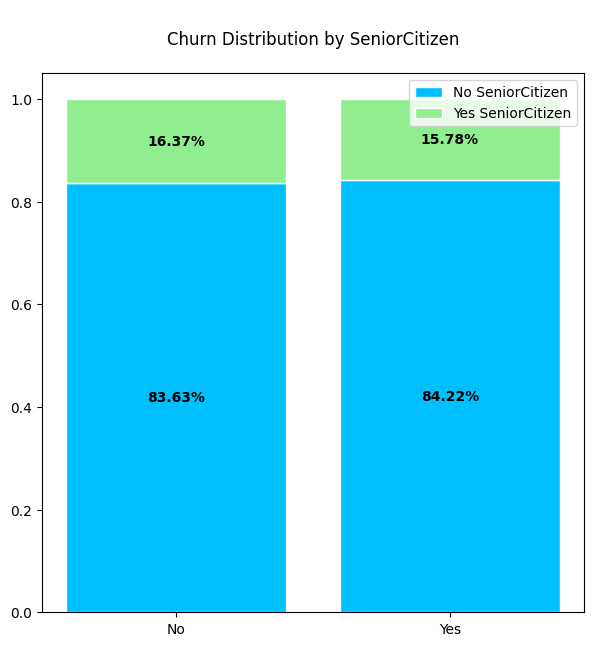

In [ ]:
print("Bar Plot of Churn Distribution by 'SeniorCitizen' :\n")
y_n_churn_var_distribution('SeniorCitizen')

#### 2. Bar Plot of Churn Distribution by 'Partner'

Bar Plot of Churn Distribution by 'Partner' :



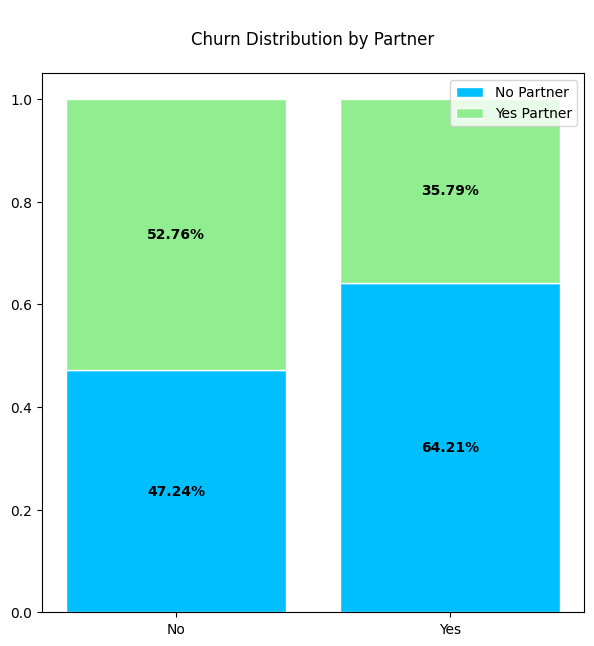

In [ ]:
print("Bar Plot of Churn Distribution by 'Partner' :\n")
y_n_churn_var_distribution('Partner')

#### 3. Bar Plot of Churn Distribution by 'Dependents'

Bar Plot of Churn Distribution by 'Dependents' :



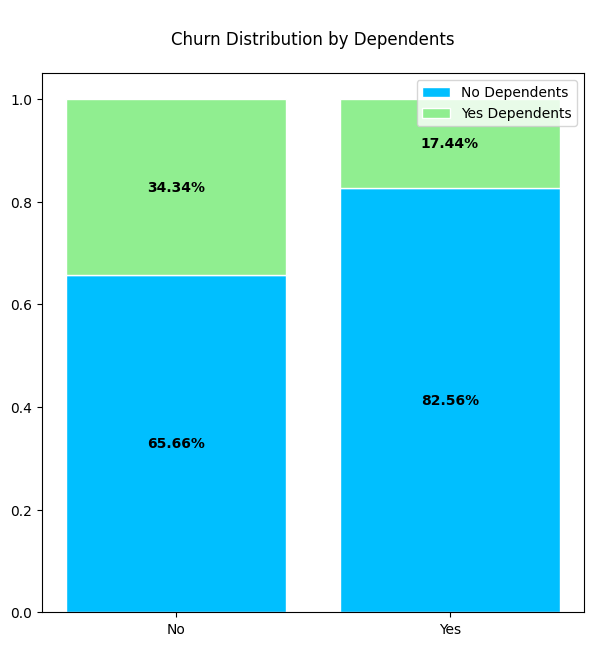

In [ ]:
print("Bar Plot of Churn Distribution by 'Dependents' :\n")
y_n_churn_var_distribution('Dependents')

#### 4. Bar Plot of Churn Distribution by 'PhoneService'

Bar Plot of Churn Distribution by 'PhoneService' :



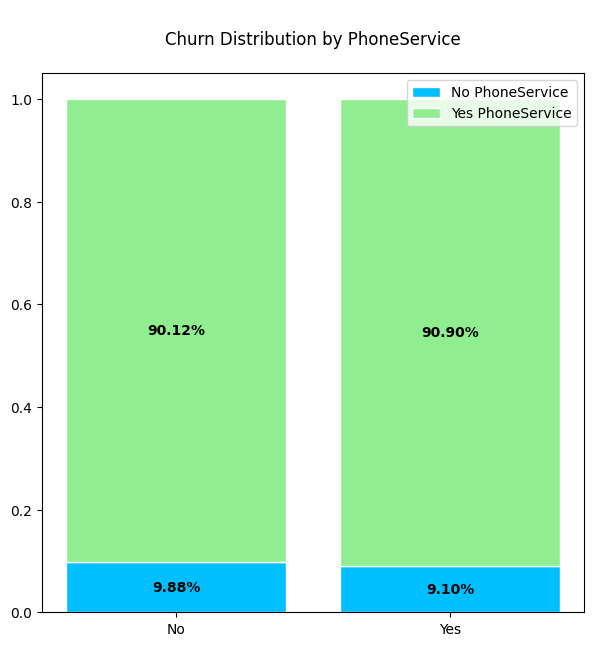

In [ ]:
print("Bar Plot of Churn Distribution by 'PhoneService' :\n")
y_n_churn_var_distribution('PhoneService')

#### 5. Bar plot of Churn Distribution by 'OnlineSecurity'

 Bar plot of Churn Distribution by 'OnlineSecurity' :



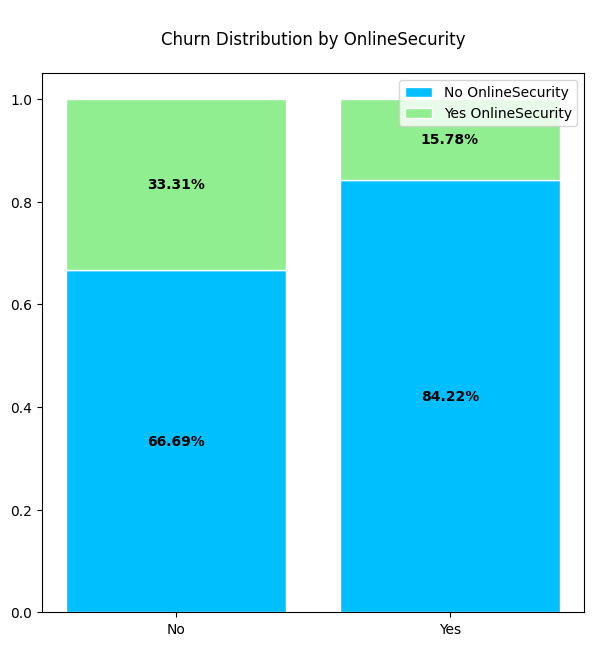

In [ ]:
print(" Bar plot of Churn Distribution by 'OnlineSecurity' :\n")
y_n_churn_var_distribution('OnlineSecurity')

#### 6. Bar Plot of Churn Distribution by 'OnlineBackup'

 Bar Plot of Churn Distribution by 'OnlineBackup' :



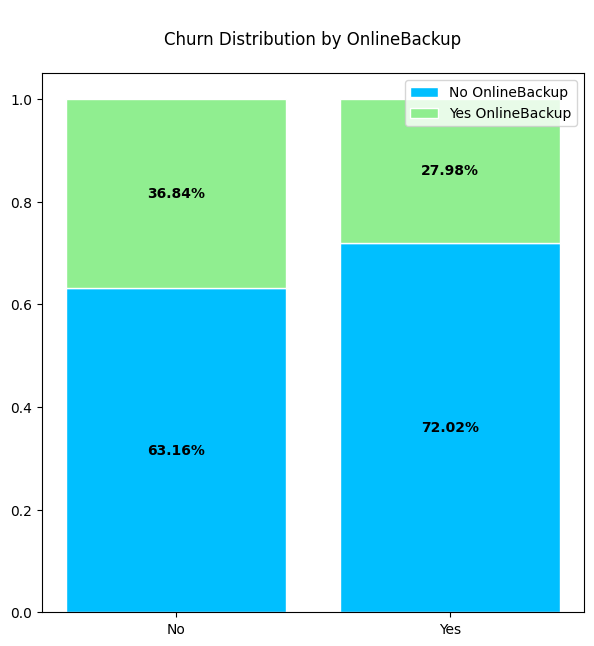

In [ ]:
print(" Bar Plot of Churn Distribution by 'OnlineBackup' :\n")
y_n_churn_var_distribution('OnlineBackup')

#### 7. Bar Plot of Churn Distribution by 'DeviceProtection'

Bar Plot of Churn Distribution by 'DeviceProtection' :



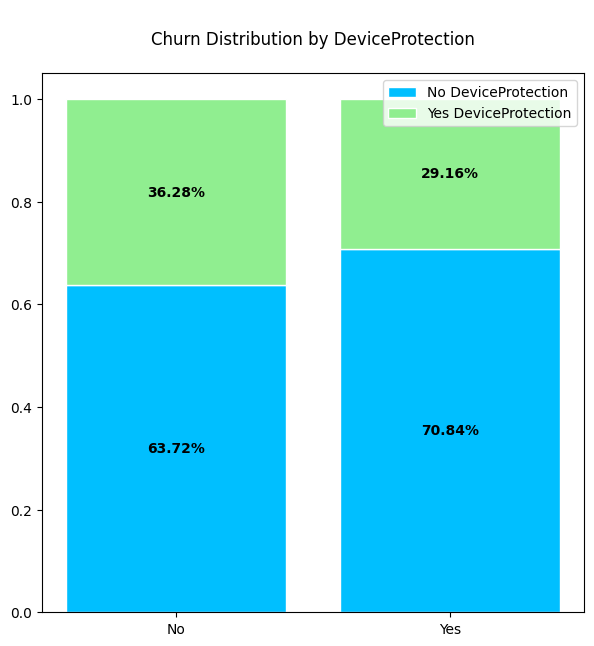

In [ ]:
print("Bar Plot of Churn Distribution by 'DeviceProtection' :\n")
y_n_churn_var_distribution('DeviceProtection')

#### 8. Bar Plot of Churn Distribution by 'TechSupport'

Bar Plot of Churn Distribution by 'TechSupport' :



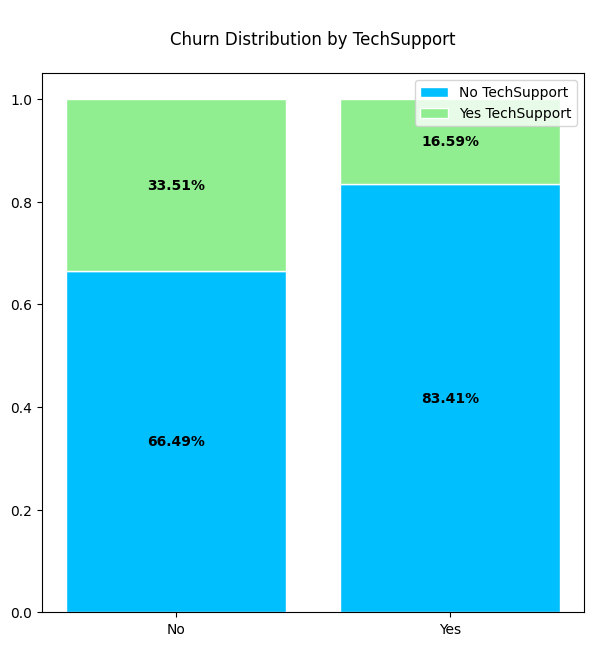

In [ ]:
print("Bar Plot of Churn Distribution by 'TechSupport' :\n")
y_n_churn_var_distribution('TechSupport')

#### 9. Bar Plot of Churn Distribution by 'StremingTV'

Bar Plot of Churn Distribution by 'StremingTV' :



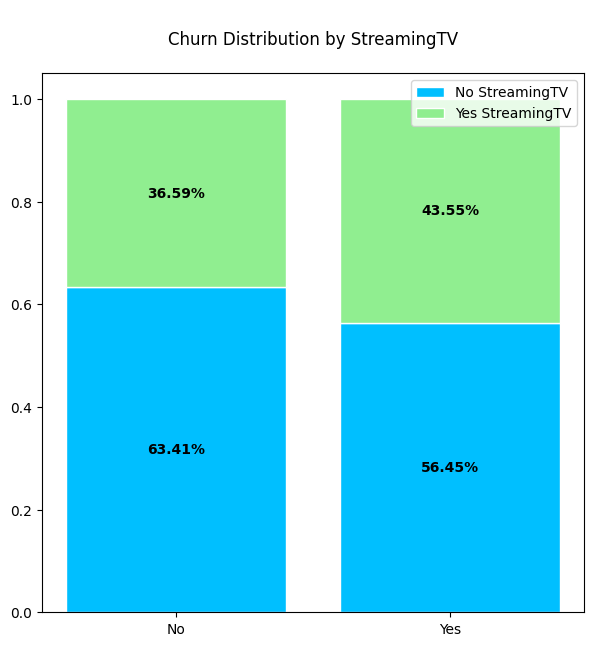

In [ ]:
print("Bar Plot of Churn Distribution by 'StremingTV' :\n")
y_n_churn_var_distribution('StreamingTV')

#### 10. Bar Plot of Churn Distribution by 'StreamingMovies'

Bar Plot of Churn Distribution by 'StreamingMovies' :



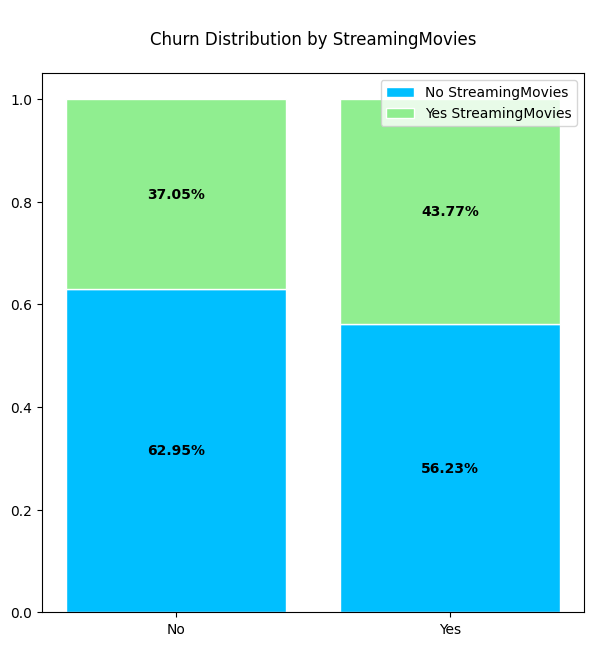

In [ ]:
print("Bar Plot of Churn Distribution by 'StreamingMovies' :\n")
y_n_churn_var_distribution('StreamingMovies')

#### 11. Bar Plot of Churn Distribution by 'PaperlessBilling'

Bar Plot of Churn Distribution by 'PaperlessBilling' :



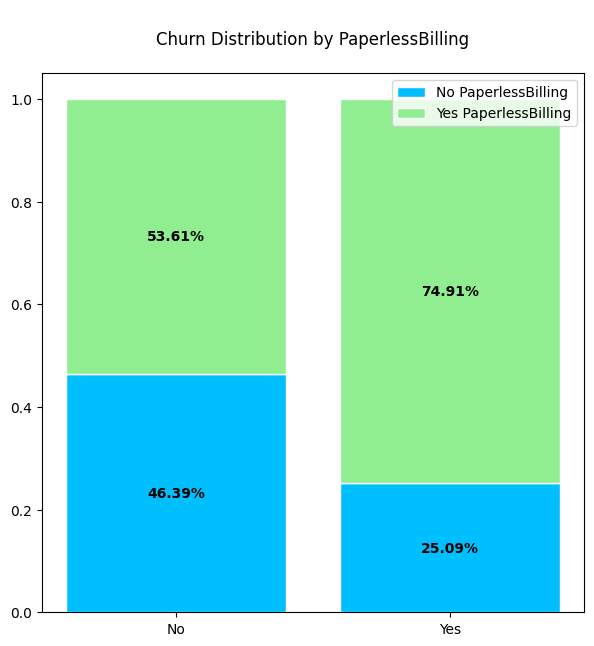

In [ ]:
print("Bar Plot of Churn Distribution by 'PaperlessBilling' :\n")
y_n_churn_var_distribution('PaperlessBilling')

### Churn Distribution by Tenure Group

Bar Plot of Churn Distribution by Tenure Group :



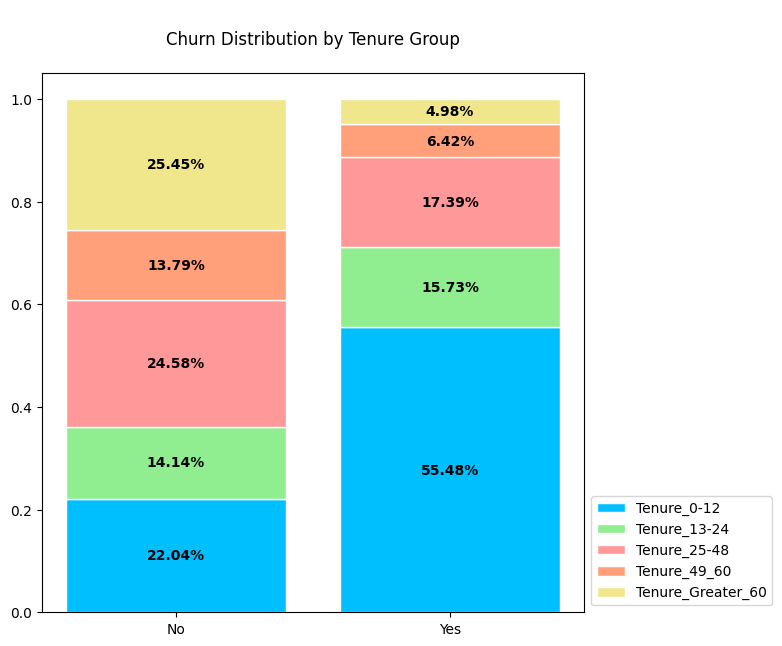

In [ ]:
no_churn = ((df_2[df_2['Churn']=='No']['tenure_group'].value_counts())
            /(df_2[df_2['Churn']=='No']['tenure_group'].value_counts().sum()))
yes_churn = ((df_2[df_2['Churn']=='Yes']['tenure_group'].value_counts())
            /(df_2[df_2['Churn']=='Yes']['tenure_group'].value_counts().sum()))

# Getting values from the group and categories
x_labels = df_2['Churn'].value_counts().keys().tolist()
t_0_12 = [no_churn['Tenure_0-12'], yes_churn['Tenure_0-12']]
t_13_24 = [no_churn['Tenure_13-24'], yes_churn['Tenure_13-24']]
t_25_48 = [no_churn['Tenure_25-48'], yes_churn['Tenure_25-48']]
t_49_60 = [no_churn['Tenure_49-60'], yes_churn['Tenure_49-60']]
t_gt_60 = [no_churn['Tenure_gt_60'], yes_churn['Tenure_gt_60']]


# Plotting bars
print("Bar Plot of Churn Distribution by Tenure Group :\n")
barWidth = 0.8
plt.figure(figsize=(7,7))
ax1 = plt.bar(x_labels, t_0_12, color='#00BFFF',
              label=('Tenure_0-12'), edgecolor='white', width=barWidth)
ax2 = plt.bar(x_labels, t_13_24, bottom=t_0_12, color='lightgreen',
              label=('Tenure_13-24'), edgecolor='white', width=barWidth)
ax3 = plt.bar(x_labels, t_25_48, bottom=np.array(t_0_12) + np.array(t_13_24), color='#FF9999',
              label=('Tenure_25-48'), edgecolor='white', width=barWidth)
ax4 = plt.bar(x_labels, t_49_60, bottom=np.array(t_0_12) + np.array(t_13_24) + np.array(t_25_48), color='#FFA07A',
              label=('Tenure_49_60'), edgecolor='white', width=barWidth)
ax5 = plt.bar(x_labels, t_gt_60, bottom=np.array(t_0_12) + np.array(t_13_24) + np.array(t_25_48) + np.array(t_49_60), color='#F0E68C',
              label=('Tenure_Greater_60'), edgecolor='white', width=barWidth)

plt.legend(loc='lower left', bbox_to_anchor=(1,0))
plt.title('\nChurn Distribution by Tenure Group\n')

for r1, r2, r3, r4, r5 in zip(ax1, ax2, ax3, ax4, ax5):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    h5 = r5.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '{:.2%}'.format(h3),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., '{:.2%}'.format(h4),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r5.get_x() + r5.get_width() / 2., h1 + h2 + h3 + h4 + h5 / 2., '{:.2%}'.format(h5),
            ha='center', va='center', color='black', fontweight='bold')



plt.show()

### Churn Distribution by Tenure Months

Histogram of Churn Distribution by Tenure Months : 



<ipython-input-50-00db283cbde1>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


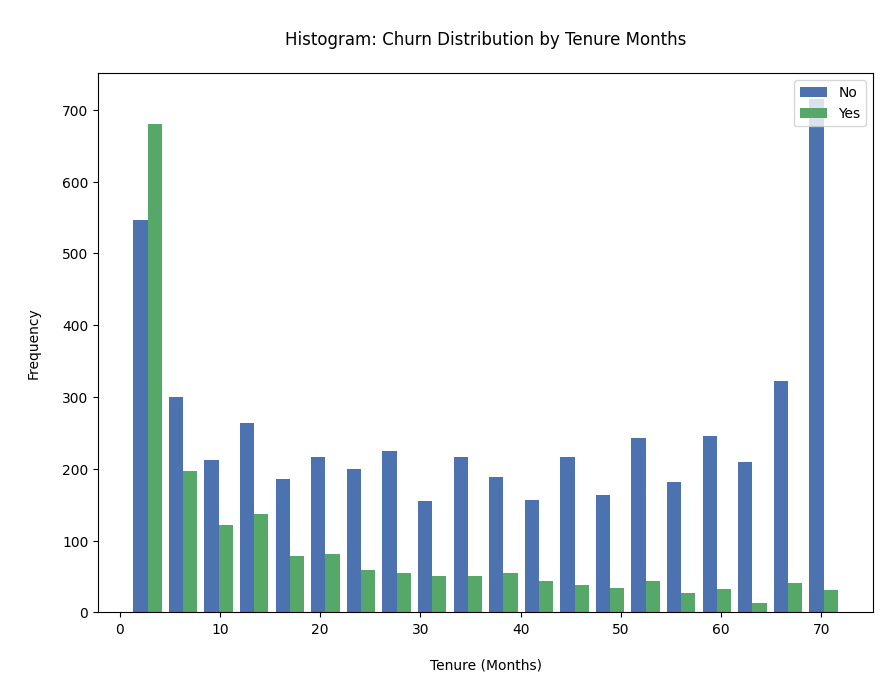

In [ ]:
print("Histogram of Churn Distribution by Tenure Months : \n")
plt.figure(figsize=(10,7))
plt.style.use('seaborn-deep')
plt.hist([df_2[df_2['Churn']=='No']['tenure'], df_2[df_2['Churn']=='Yes']['tenure']],
         bins=20,
         label=['No', 'Yes'])
plt.legend(loc='upper right')
plt.title('\nHistogram: Churn Distribution by Tenure Months\n')
plt.xlabel('\nTenure (Months)\n')
plt.ylabel('\nFrequency\n')
plt.show()

### Churn Rate by Tenure (Months)

Scatter Plot of Churn Rate by Tenure (Months) :



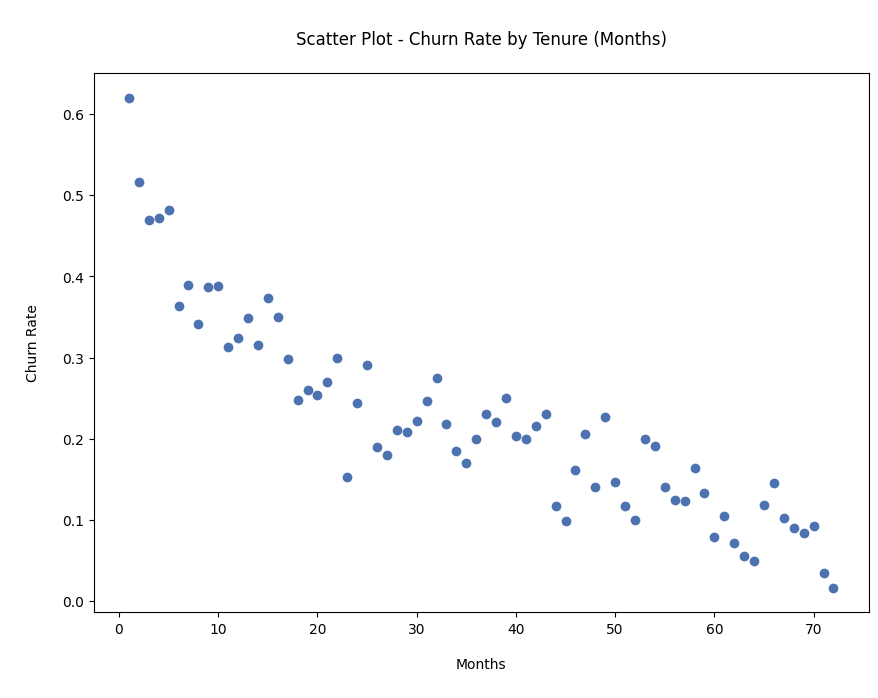

In [ ]:
df_2_tenure_plot = df_2.copy()
df_2_tenure_plot.loc[df_2_tenure_plot['Churn']=='No', 'Churn'] = 0
df_2_tenure_plot.loc[df_2_tenure_plot['Churn']=='Yes', 'Churn'] = 1
df_2_tenure_plot['Churn'] = df_2_tenure_plot['Churn'].astype(int)

# Exclude non-numeric columns from the mean calculation
scatter_plot = df_2_tenure_plot.groupby('tenure').agg({'Churn': 'mean'}).reset_index()

print("Scatter Plot of Churn Rate by Tenure (Months) :\n")
plt.figure(figsize=(10,7))
plt.scatter(scatter_plot['tenure'], scatter_plot['Churn'])
plt.title('\nScatter Plot - Churn Rate by Tenure (Months)\n')
plt.xlabel('\nMonths\n')
plt.ylabel('\nChurn Rate\n')
plt.show()

### Churn Distribution by Payment Method

Bar Plot of Churn Distribution by Payment Method : 



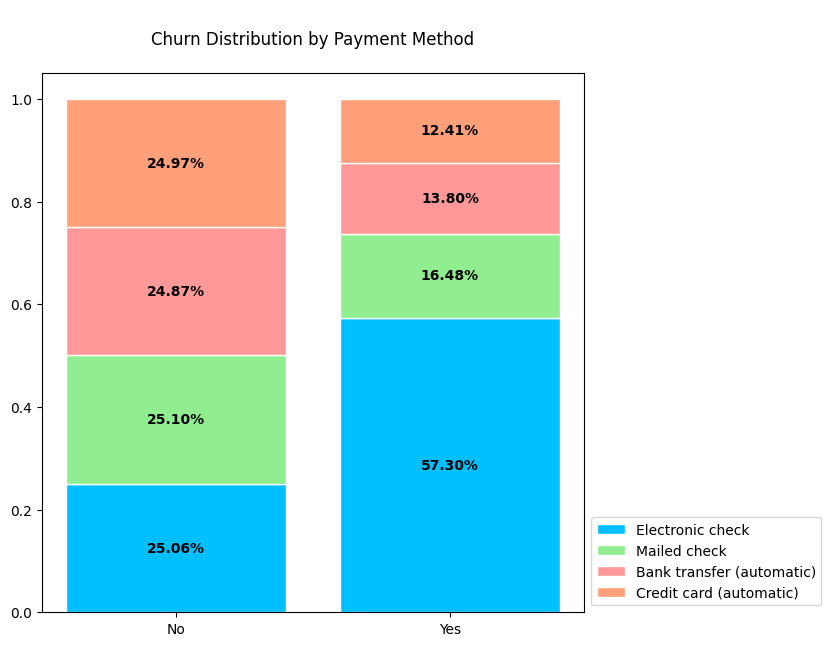

In [ ]:
no_churn = ((df_2[df_2['Churn']=='No']['PaymentMethod'].value_counts())
            /(df_2[df_2['Churn']=='No']['PaymentMethod'].value_counts().sum()))
yes_churn = ((df_2[df_2['Churn']=='Yes']['PaymentMethod'].value_counts())
            /(df_2[df_2['Churn']=='Yes']['PaymentMethod'].value_counts().sum()))

# Getting values from the group and categories
x_labels = df_2['Churn'].value_counts().keys().tolist()
elec_check = [no_churn['Electronic check'], yes_churn['Electronic check']]
mail_check = [no_churn['Mailed check'], yes_churn['Mailed check']]
bank_tr = [no_churn['Bank transfer (automatic)'], yes_churn['Bank transfer (automatic)']]
credit_c = [no_churn['Credit card (automatic)'], yes_churn['Credit card (automatic)']]


# Plotting bars
print("Bar Plot of Churn Distribution by Payment Method : \n")
barWidth = 0.8
plt.figure(figsize=(7,7))
ax1 = plt.bar(x_labels, elec_check, color='#00BFFF',
              label=('Electronic check'), edgecolor='white', width=barWidth)
ax2 = plt.bar(x_labels, mail_check, bottom=elec_check, color='lightgreen',
              label=('Mailed check'), edgecolor='white', width=barWidth)
ax3 = plt.bar(x_labels, bank_tr, bottom=np.array(elec_check) + np.array(mail_check), color='#FF9999',
              label=('Bank transfer (automatic)'), edgecolor='white', width=barWidth)
ax4 = plt.bar(x_labels, credit_c, bottom=np.array(elec_check) + np.array(mail_check) + np.array(bank_tr), color='#FFA07A',
              label=('Credit card (automatic)'), edgecolor='white', width=barWidth)

plt.legend(loc='lower left', bbox_to_anchor=(1,0))
plt.title('\nChurn Distribution by Payment Method\n')

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '{:.2%}'.format(h3),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., '{:.2%}'.format(h4),
            ha='center', va='center', color='black', fontweight='bold')
plt.show()

### Churn Distribution by Internet Service

Bar Plot of Churn Distribution by Internet Service :



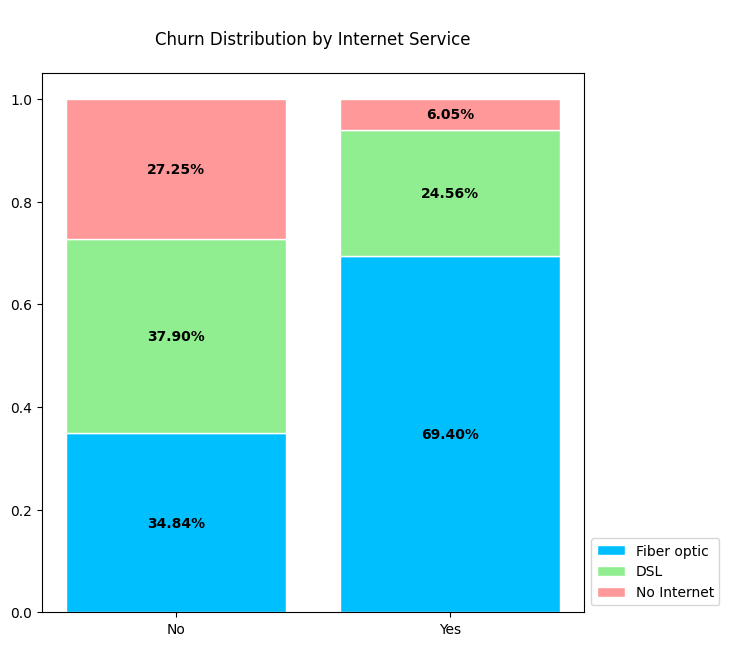

In [ ]:
no_churn = ((df_2[df_2['Churn']=='No']['InternetService'].value_counts())
            /(df_2[df_2['Churn']=='No']['InternetService'].value_counts().sum()))
yes_churn = ((df_2[df_2['Churn']=='Yes']['InternetService'].value_counts())
            /(df_2[df_2['Churn']=='Yes']['InternetService'].value_counts().sum()))

# Getting values from the group and categories
x_labels = df_2['Churn'].value_counts().keys().tolist()
fiber_op = [no_churn['Fiber optic'], yes_churn['Fiber optic']]
dsl = [no_churn['DSL'], yes_churn['DSL']]
no_int = [no_churn['No'], yes_churn['No']]


# Plotting bars
print("Bar Plot of Churn Distribution by Internet Service :\n")
barWidth = 0.8
plt.figure(figsize=(7,7))
ax1 = plt.bar(x_labels, fiber_op, color='#00BFFF',
              label=('Fiber optic'), edgecolor='white', width=barWidth)
ax2 = plt.bar(x_labels, dsl, bottom=fiber_op, color='lightgreen',
              label=('DSL'), edgecolor='white', width=barWidth)
ax3 = plt.bar(x_labels, no_int, bottom=np.array(fiber_op) + np.array(dsl), color='#FF9999',
              label=('No Internet'), edgecolor='white', width=barWidth)

plt.legend(loc='lower left', bbox_to_anchor=(1,0))
plt.title('\nChurn Distribution by Internet Service\n')

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '{:.2%}'.format(h3),
            ha='center', va='center', color='black', fontweight='bold')

plt.show()

### Churn Distribution by Contract Type

Bar Plot of Churn Distribution by Contract Type :



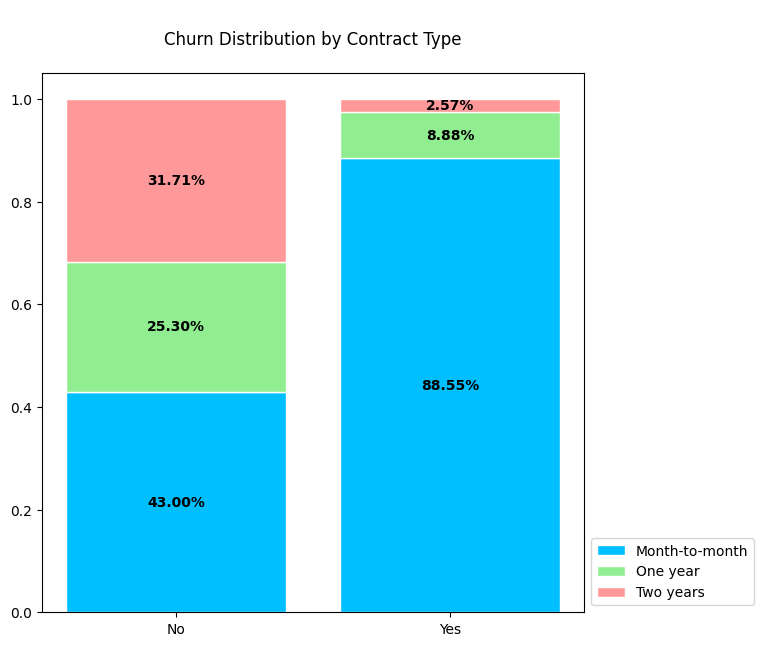

In [ ]:
no_churn = ((df_2[df_2['Churn']=='No']['Contract'].value_counts())
            /(df_2[df_2['Churn']=='No']['Contract'].value_counts().sum()))
yes_churn = ((df_2[df_2['Churn']=='Yes']['Contract'].value_counts())
            /(df_2[df_2['Churn']=='Yes']['Contract'].value_counts().sum()))

# Getting values from the group and categories
x_labels = df_2['Churn'].value_counts().keys().tolist()
m_t_m = [no_churn['Month-to-month'], yes_churn['Month-to-month']]
one_y = [no_churn['One year'], yes_churn['One year']]
two_y = [no_churn['Two year'], yes_churn['Two year']]


# Plotting bars
print("Bar Plot of Churn Distribution by Contract Type :\n")
barWidth = 0.8
plt.figure(figsize=(7,7))
ax1 = plt.bar(x_labels, m_t_m, color='#00BFFF',
              label=('Month-to-month'), edgecolor='white', width=barWidth)
ax2 = plt.bar(x_labels, one_y, bottom=m_t_m, color='lightgreen',
              label=('One year'), edgecolor='white', width=barWidth)
ax3 = plt.bar(x_labels, two_y, bottom=np.array(m_t_m) + np.array(one_y), color='#FF9999',
              label=('Two years'), edgecolor='white', width=barWidth)

plt.legend(loc='lower left', bbox_to_anchor=(1,0))
plt.title('\nChurn Distribution by Contract Type\n')

for r1, r2, r3 in zip(ax1, ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2%}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '{:.2%}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '{:.2%}'.format(h3),
            ha='center', va='center', color='black', fontweight='bold')

plt.show()

### Average Monthly Charges by Tenure Group

<ipython-input-55-8d66eb7d0e3e>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


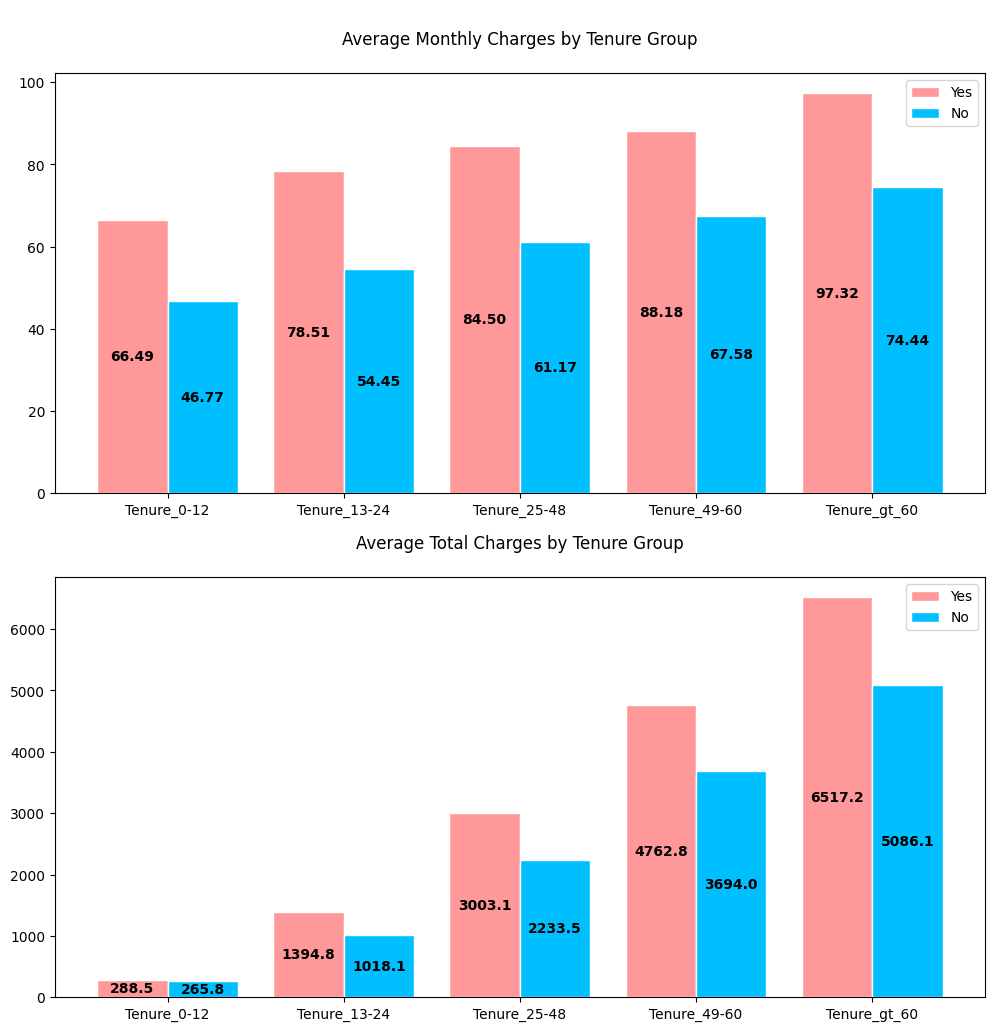

In [ ]:
groups = df_2['tenure_group'].value_counts().keys().tolist()
groups.sort()
mean_yes_m_charges = {}
mean_no_m_charges = {}
mean_yes_t_charges = {}
mean_no_t_charges = {}
for group in groups:
    mean_yes_m_charges[group] = np.mean(df_2[(df_2['tenure_group']==group) & (df_2['Churn']=='Yes')]['MonthlyCharges'])
    mean_no_m_charges[group] = np.mean(df_2[(df_2['tenure_group']==group) & (df_2['Churn']=='No')]['MonthlyCharges'])
    mean_yes_t_charges[group] = np.mean(df_2[(df_2['tenure_group']==group) & (df_2['Churn']=='Yes')]['TotalCharges'])
    mean_no_t_charges[group] = np.mean(df_2[(df_2['tenure_group']==group) & (df_2['Churn']=='No')]['TotalCharges'])

plt.subplots(figsize=(12,12))
plt.subplot(211)
barWidth = 0.4
ax1 = plt.bar(np.arange(len(groups)),
              list(mean_yes_m_charges.values()),
              barWidth,
              color='#FF9999',
              edgecolor='white')
ax2 = plt.bar(np.arange(len(groups))+barWidth,
              list(mean_no_m_charges.values()),
              barWidth,
              color='#00BFFF',
              edgecolor='white')
plt.xticks(np.arange(len(groups))+barWidth/2, groups)
plt.legend(['Yes', 'No'])
plt.title('\nAverage Monthly Charges by Tenure Group\n')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.2f}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h2 / 2., '{:.2f}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')

plt.subplot(212)
ax1 = plt.bar(np.arange(len(groups)),
              list(mean_yes_t_charges.values()),
              barWidth,
              color='#FF9999',
              edgecolor='white')
ax2 = plt.bar(np.arange(len(groups))+barWidth,
              list(mean_no_t_charges.values()),
              barWidth,
              color='#00BFFF',
              edgecolor='white')
plt.xticks(np.arange(len(groups))+barWidth/2, groups)
plt.legend(['Yes', 'No'])
plt.title('\n\nAverage Total Charges by Tenure Group\n')

for r1, r2 in zip(ax1, ax2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '{:.1f}'.format(h1),
            ha='center', va='center', color='black', fontweight='bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h2 / 2., '{:.1f}'.format(h2),
            ha='center', va='center', color='black', fontweight='bold')

plt.show()

### Label Encoding of "Churn' Column

transforming the categorical column 'Churn' in df_2 into numerical values.

In [ ]:
le = LabelEncoder()
df_2['Churn'] = le.fit_transform(df_2['Churn'])

### One-Hot Encoding

one-hot encoding the categorical variables and numeric columns in the Dataset

In [ ]:
df_2_dummies = pd.get_dummies(df_2[num_att + cat_att + target])
df_2_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_13-24,tenure_group_Tenure_25-48,tenure_group_Tenure_49-60,tenure_group_Tenure_gt_60
0,1,29.85,29.85,0,True,False,True,False,False,True,...,True,False,False,True,False,True,False,False,False,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
2,2,53.85,108.15,1,False,True,True,False,True,False,...,True,False,False,False,True,True,False,False,False,False
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,2,70.70,151.65,1,True,False,True,False,True,False,...,True,False,False,True,False,True,False,False,False,False


### Correlation among Variables

Correlation Heatmap :



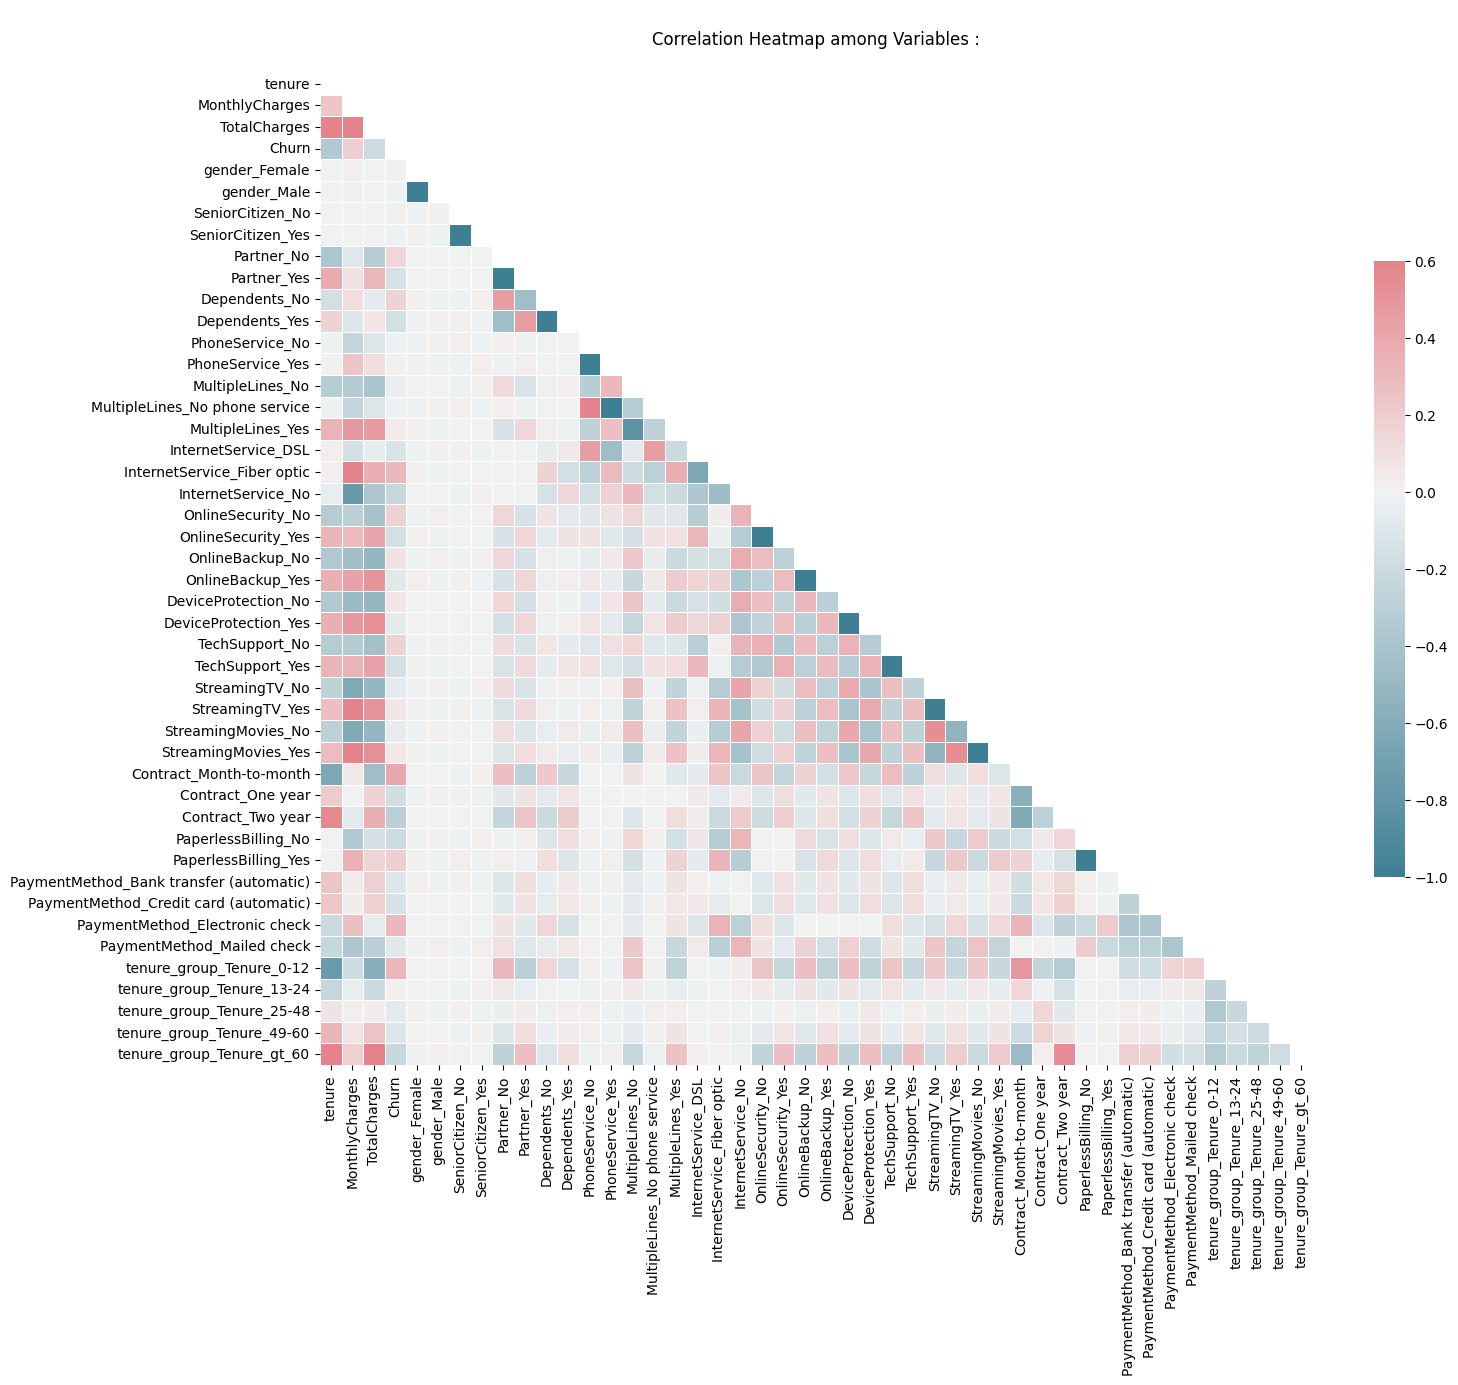

In [ ]:
corr_matrix = df_2_dummies.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

print("Correlation Heatmap :\n")
# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.6, center=0,
            xticklabels=(df_2_dummies.nunique().keys().tolist()),
            yticklabels=(df_2_dummies.nunique().keys().tolist()),
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('\nCorrelation Heatmap among Variables :\n')
plt.show()

### Correlation values between the 'Churn' column and all other columns

In [ ]:
print("Correlation values between the 'Churn' column and all other columns :\n")
corr_matrix['Churn'].sort_values(ascending=False)

Correlation values between the 'Churn' column and all other columns :



,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
tenure_group_Tenure_0-12,0.319628
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
MonthlyCharges,0.192858
PaperlessBilling_Yes,0.191454
OnlineSecurity_No,0.171270
TechSupport_No,0.164716
Dependents_No,0.163128


##5. Data Preparation

### Data Splitting

In [ ]:
y = df_2['Churn'].copy()
X = df_2.drop(['Churn', 'customerID'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [ ]:
print("The Shape of Training Data of 'X' Variables : ",X_train.shape)
print("\nThe Shape of Training Data of 'Y' Variables : ",y_train.shape)
print("\nThe Shape of Testing Data of 'X' Variables : ",X_test.shape)
print("\nThe Shape of Testing Data of 'Y' Variables : ",y_test.shape)

The Shape of Training Data of 'X' Variables :  (5274, 20)

The Shape of Training Data of 'Y' Variables :  (5274,)

The Shape of Testing Data of 'X' Variables :  (1758, 20)

The Shape of Testing Data of 'Y' Variables :  (1758,)


### Custom Transformer Class 'DataFrameSelector'

This transformer is being used in a pipeline to select a subset of columns from a DataFrame before applying further transformations or models.

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.attribute_names = feature_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

By defining two separate data processing pipelines, one for numerical features (num_pipeline) and one for categorical features (cat_pipeline), and combines them into a full pipeline (full_pipeline) using FeatureUnion :-

In [ ]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_att)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_att)),
    ('cat_encoder', OneHotEncoder(sparse=False))
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [ ]:
X_train_prepared = full_pipeline.fit_transform(X_train)
y_train_prepared = y_train.to_numpy()
print(type(X_train_prepared))
print(type(y_train_prepared))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


6. Modelling

In [ ]:
X_test_prepared = full_pipeline.fit_transform(X_test)
y_test_prepared = y_test.to_numpy()
print(type(X_test_prepared))
print(type(y_test_prepared))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


6.1 Scikit-Learn

In [ ]:
def model_scores(model, X_train, y_train):
    pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, pred)
    auc = roc_auc_score(y_train, pred)
    recall = recall_score(y_train, pred)
    precision = precision_score(y_train, pred)
    f1 = f1_score(y_train, pred)
    print(' Accuracy: {:.3f}'.format(accuracy))
    print('      AUC: {:.3f}'.format(auc))
    print('   Recall: {:.3f}'.format(recall))
    print('Precision: {:.3f}'.format(precision))
    print(' F1-Score: {:.3f}'.format(f1))
    print('\n', 'Confusion Matrix:\n', confusion_matrix(y_train, pred))
    return accuracy, auc, recall, precision, f1


The function model_scores evaluates the performance of a given machine learning model on the training data and prints several classification metrics.

In [ ]:
def cv_model_scores(model, X_train, y_train):

    cv_scores = cross_validate(model, X_train, y_train, scoring=('roc_auc', 'accuracy', 'precision', 'recall'), cv=5, return_train_score=True)

    mean_tr_auc = np.mean(cv_scores['train_roc_auc'])
    mean_val_auc = np.mean(cv_scores['test_roc_auc'])
    mean_tr_acc = np.mean(cv_scores['train_accuracy'])
    mean_val_acc = np.mean(cv_scores['test_accuracy'])
    mean_tr_pre = np.mean(cv_scores['train_precision'])
    mean_val_pre = np.mean(cv_scores['test_precision'])
    mean_tr_rec = np.mean(cv_scores['train_recall'])
    mean_val_rec = np.mean(cv_scores['test_recall'])

    print('      Avg CV AUC: %.3f' % mean_val_auc)
    print('      Avg CV Acc: %.3f' % mean_val_acc)
    print('Avg CV Precision: %.3f' % mean_val_pre)
    print('   Avg CV Recall: %.3f' % mean_val_rec)

    return mean_val_auc, mean_val_acc, mean_val_pre, mean_val_rec

The function 'cv_model_scores' performs cross-validation on a given machine learning model, calculates multiple performance metrics across different folds, and returns the average values for those metrics.

## 6. ML Model Implementation

### 1. Naive Bayes

In [ ]:
nbm = GaussianNB()
nbm.fit(X_train_prepared, y_train_prepared)

GaussianNB()

In [ ]:
nbm_tr_auc, nbm_tr_acc, nbm_tr_pre, nbm_tr_rec = cv_model_scores(nbm, X_train_prepared, y_train_prepared)

      Avg CV AUC: 0.831
      Avg CV Acc: 0.747
Avg CV Precision: 0.517
   Avg CV Recall: 0.780


In [ ]:
nbm_te_auc, nbm_te_acc, nbm_te_pre, nbm_te_rec = cv_model_scores(nbm, X_test_prepared, y_test_prepared)

      Avg CV AUC: 0.824
      Avg CV Acc: 0.743
Avg CV Precision: 0.510
   Avg CV Recall: 0.789


### 2. Logistic Regression

In [ ]:
lgm = LogisticRegression(max_iter=1000)
lgm.fit(X_train_prepared, y_train_prepared)

LogisticRegression(max_iter=1000)

In [ ]:
lgm_tr_auc, lgm_tr_acc, lgm_tr_pre, lgm_tr_rec = cv_model_scores(lgm, X_train_prepared, y_train_prepared)

      Avg CV AUC: 0.846
      Avg CV Acc: 0.804
Avg CV Precision: 0.668
   Avg CV Recall: 0.527


In [ ]:

lgm_te_auc, lgm_te_acc, lgm_te_pre, lgm_te_rec = cv_model_scores(lgm, X_test_prepared, y_test_prepared)

      Avg CV AUC: 0.836
      Avg CV Acc: 0.796
Avg CV Precision: 0.654
   Avg CV Recall: 0.515


### 3. Support Vector Machine

Support Vector Machine algorithms are very well suited for classification of complex small or medium sized datasets, which is our case. So, we will give it a go.

In [ ]:
svm = SVC(kernel='linear',C=1)
svm.fit(X_train_prepared, y_train_prepared)

SVC(C=1, kernel='linear')

In [ ]:
svm_tr_auc, svm_tr_acc, svm_tr_pre, svm_tr_rec = cv_model_scores(svm, X_train_prepared, y_train_prepared)

      Avg CV AUC: 0.830
      Avg CV Acc: 0.795
Avg CV Precision: 0.660
   Avg CV Recall: 0.482


In [ ]:
svm_te_auc, svm_te_acc, svm_te_pre, svm_te_rec = cv_model_scores(svm, X_test_prepared, y_test_prepared)

      Avg CV AUC: 0.817
      Avg CV Acc: 0.795
Avg CV Precision: 0.666
   Avg CV Recall: 0.459


### 4. Random Forest Classifier

Random Forest Classifier wi bw trained directly with a Random Grid Search aiming at improving results in the first run. So let's first create the search space:

In [ ]:
n_estimators = [int (x) for x in np.linspace(start=100, stop=1000, num=10)]
max_features = ['auto', 'log2']
bootstrap = [True, False]

# Creating the random grid
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'bootstrap': bootstrap}

# Random Grid Search
rfm = RandomForestClassifier()
rf_rgs = RandomizedSearchCV(estimator=rfm, param_distributions=random_grid, n_iter = 10*2*2, #total param combinations
                            cv = 5, random_state=24, scoring='accuracy', n_jobs=-1)

rf_rgs.fit(X_train_prepared, y_train_prepared)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=24, scoring='accuracy')

In [ ]:
rf_rgs.best_params_

{'n_estimators': 500, 'max_features': 'log2', 'bootstrap': True}

In [ ]:
best_rfm = rf_rgs.best_estimator_
rfm_tr_auc, rfm_tr_acc, rfm_tr_pre, rfm_tr_rec = cv_model_scores(best_rfm, X_train_prepared, y_train_prepared)

      Avg CV AUC: 0.821
      Avg CV Acc: 0.780
Avg CV Precision: 0.615
   Avg CV Recall: 0.466


In [ ]:
rfm_te_auc, rfm_te_acc, rfm_te_pre, rfm_te_rec = cv_model_scores(best_rfm, X_test_prepared, y_test_prepared)

      Avg CV AUC: 0.822
      Avg CV Acc: 0.794
Avg CV Precision: 0.649
   Avg CV Recall: 0.491


### 5. CatBoost

In [ ]:
cbm = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.01, loss_function='Logloss', eval_metric='Accuracy',
                         custom_metric=['Logloss', 'AUC:hints=skip_train~false'], random_seed=24, verbose=True)

In [ ]:
cbm.fit(X_train, y_train, cat_features=cat_att, eval_set=(X_test, y_test))

0:	learn: 0.7883959	test: 0.7855518	best: 0.7855518 (0)	total: 96.6ms	remaining: 48.2s
1:	learn: 0.7861206	test: 0.7889647	best: 0.7889647 (1)	total: 105ms	remaining: 26.2s
2:	learn: 0.7914297	test: 0.7997725	best: 0.7997725 (2)	total: 119ms	remaining: 19.7s
3:	learn: 0.7956011	test: 0.8031854	best: 0.8031854 (3)	total: 181ms	remaining: 22.5s
4:	learn: 0.7944634	test: 0.8003413	best: 0.8031854 (3)	total: 190ms	remaining: 18.8s
5:	learn: 0.7944634	test: 0.8003413	best: 0.8031854 (3)	total: 246ms	remaining: 20.2s
6:	learn: 0.7923777	test: 0.7997725	best: 0.8031854 (3)	total: 260ms	remaining: 18.3s
7:	learn: 0.7916193	test: 0.8003413	best: 0.8031854 (3)	total: 284ms	remaining: 17.4s
8:	learn: 0.7952218	test: 0.8043231	best: 0.8043231 (8)	total: 356ms	remaining: 19.4s
9:	learn: 0.7925673	test: 0.8026166	best: 0.8043231 (8)	total: 370ms	remaining: 18.1s
10:	learn: 0.7984452	test: 0.7997725	best: 0.8043231 (8)	total: 447ms	remaining: 19.9s
11:	learn: 0.7965491	test: 0.7997725	best: 0.8043231

In [ ]:
cbm.get_best_score()

{'learn': {'Accuracy': 0.8505877891543421,
  'Logloss': 0.3300755673837881,
  'AUC': 0.9205301010219934},
 'validation': {'Accuracy': 0.8117178612059158,
  'Logloss': 0.41188354709963904,
  'AUC': 0.8490105193732346}}

In [ ]:
cbm_accuracy_train = cbm.score(X_train, y_train)
cbm_accuracy_test = cbm.score(X_test, y_test)
print('Train Acc: %.3f' % cbm_accuracy_train)
print('Test Acc: %.3f' % cbm_accuracy_test)

Train Acc: 0.819
Test Acc: 0.812


#### Hyperparamter Optimization

Now a function optimizer will be implemented by using Hyperopt aiming at identifying the hyperparamters that yield the lowest Logloss and highest Accuracy:

The template of the optimization function used below was obtained in the following link:

https://colab.research.google.com/drive/1Lte4Pb4lw_w7OGp2wqwS5a50ZgBIcW6j#scrollTo=qZJ28r0Bj5fO

In [ ]:
D_train = pool(X_train, y_train, cat_features=cat_att)
D_test = pool(X_test, y_test, cat_features=cat_att)

In [ ]:
# number of random sampled hyperparameters
N_HYPEROPT_PROBES = 15

# the sampling aplgorithm
HYPEROPT_ALGO = tpe.suggest

def get_catboost_params(space):
    params = dict()
    params['learning_rate'] = space['learning_rate']
    params['depth'] = int(space['depth'])
    params['l2_leaf_reg'] = space['l2_leaf_reg']
    params['one_hot_max_size'] = space['one_hot_max_size']
    return params

# ---------------------------------------------------------------------

obj_call_count = 0
cur_best_loss = np.inf
log_writer = open( 'catboost-hyperopt-log.txt', 'w' )


def objective(space):
    global obj_call_count, cur_best_loss

    obj_call_count += 1

    print('\nCatBoost objective call #{} cur_best_loss={:7.5f}'.format(obj_call_count,cur_best_loss) )

    params = get_catboost_params(space)

    model = CatBoostClassifier(iterations=500,
                               learning_rate=params['learning_rate'],
                               depth =int(params['depth']),
                               eval_metric = "Accuracy",
                               l2_leaf_reg=params['l2_leaf_reg'],
                               bagging_temperature=1,
                               one_hot_max_size=params['one_hot_max_size'],
                               use_best_model=True)

    model.fit(D_train, eval_set=D_test, silent=True)
    val_loss = model.best_score_['validation']['Logloss']

    if val_loss<cur_best_loss:
      cur_best_loss = val_loss

    return{'loss':cur_best_loss, 'status': STATUS_OK}


# --------------------------------------------------------------------------------

space ={
        'depth': hp.quniform("depth", 4, 12, 1),
        'learning_rate': hp.loguniform('learning_rate', -3.0, -0.7),
        'l2_leaf_reg': hp.uniform('l2_leaf_reg', 1, 10),
        'one_hot_max_size': hp.quniform("one_hot_max_size", 0, 15, 1)
       }


trials = Trials()
best = hyperopt.fmin(fn=objective,
                     space=space,
                     algo=HYPEROPT_ALGO,
                     max_evals=N_HYPEROPT_PROBES,
                     trials=trials)

print('-'*50)
print('The best params:')
print( best )
print('\n\n')


CatBoost objective call #1 cur_best_loss=    inf

CatBoost objective call #2 cur_best_loss=0.40870

CatBoost objective call #3 cur_best_loss=0.40870

CatBoost objective call #4 cur_best_loss=0.40870

CatBoost objective call #5 cur_best_loss=0.40870

CatBoost objective call #6 cur_best_loss=0.40870

CatBoost objective call #7 cur_best_loss=0.40870

CatBoost objective call #8 cur_best_loss=0.40870

CatBoost objective call #9 cur_best_loss=0.40870

CatBoost objective call #10 cur_best_loss=0.40870

CatBoost objective call #11 cur_best_loss=0.40870

CatBoost objective call #12 cur_best_loss=0.40870

CatBoost objective call #13 cur_best_loss=0.40870

CatBoost objective call #14 cur_best_loss=0.40870

CatBoost objective call #15 cur_best_loss=0.40870
100%|██████████| 15/15 [07:34<00:00, 30.33s/trial, best loss: 0.40742067086777906]
--------------------------------------------------
The best params:
{'depth': 4.0, 'l2_leaf_reg': 1.5567853637579923, 'learning_rate': 0.08653345469644687, 'one_

#### CatBoostClassifier

In [ ]:
cbm_best = CatBoostClassifier(iterations=500,
                              depth=best['depth'],
                              learning_rate=best['learning_rate'],
                              one_hot_max_size=best['one_hot_max_size'],
                              l2_leaf_reg= best['l2_leaf_reg'],
                              use_best_model=True,
                              loss_function='Logloss',
                              custom_metric=['Logloss', 'AUC:hints=skip_train~false'],
                              eval_metric='Accuracy',
                              random_seed=24,
                              verbose=True)

In [ ]:
cbm_best.fit(X_train, y_train, cat_features=cat_att, eval_set=D_test)

0:	learn: 0.7760713	test: 0.7861206	best: 0.7861206 (0)	total: 2.67ms	remaining: 1.33s
1:	learn: 0.7787258	test: 0.7918089	best: 0.7918089 (1)	total: 5.98ms	remaining: 1.49s
2:	learn: 0.7872582	test: 0.7963595	best: 0.7963595 (2)	total: 8.81ms	remaining: 1.46s
3:	learn: 0.7827076	test: 0.7997725	best: 0.7997725 (3)	total: 11.7ms	remaining: 1.45s
4:	learn: 0.7825180	test: 0.8009101	best: 0.8009101 (4)	total: 14.7ms	remaining: 1.45s
5:	learn: 0.7825180	test: 0.8003413	best: 0.8009101 (4)	total: 17.6ms	remaining: 1.45s
6:	learn: 0.7827076	test: 0.7997725	best: 0.8009101 (4)	total: 20.5ms	remaining: 1.44s
7:	learn: 0.7851725	test: 0.7997725	best: 0.8009101 (4)	total: 23.3ms	remaining: 1.43s
8:	learn: 0.7880167	test: 0.8014790	best: 0.8014790 (8)	total: 26ms	remaining: 1.42s
9:	learn: 0.7887751	test: 0.8026166	best: 0.8026166 (9)	total: 28.6ms	remaining: 1.4s
10:	learn: 0.7918089	test: 0.7986348	best: 0.8026166 (9)	total: 31.5ms	remaining: 1.4s
11:	learn: 0.7912400	test: 0.7997725	best: 0.8

In [ ]:
cbm_best.best_score_

{'learn': {'Accuracy': 0.8632916192643155,
  'Logloss': 0.3096880505523829,
  'AUC': 0.9291397355933513},
 'validation': {'Accuracy': 0.8156996587030717,
  'Logloss': 0.40825659529040775,
  'AUC': 0.8515770732292277}}

In [ ]:
print('Best Iteration: ', cbm_best.get_best_iteration())
best_scores = cbm_best.get_best_score()
print(best_scores)

Best Iteration:  59
{'learn': {'Accuracy': 0.8632916192643155, 'Logloss': 0.3096880505523829, 'AUC': 0.9291397355933513}, 'validation': {'Accuracy': 0.8156996587030717, 'Logloss': 0.40825659529040775, 'AUC': 0.8515770732292277}}


In [ ]:
cbm_best_accuracy_train = cbm_best.score(X_train, y_train)
cbm_best_accuracy_test = cbm_best.score(X_test, y_test)
print('Train Acc: %.3f' % cbm_best_accuracy_train)
print('Test Acc: %.3f' % cbm_best_accuracy_test)

cbm_best_auc_train = best_scores['learn']['AUC']
cbm_best_auc_test = best_scores['validation']['AUC']
print('Train AUC: %.3f' % cbm_best_auc_train)
print('Test AUC: %.3f' % cbm_best_auc_test)

Train Acc: 0.810
Test Acc: 0.816
Train AUC: 0.929
Test AUC: 0.852


In [ ]:
best_scores['learn']['AUC']

0.9291397355933513

In [ ]:
get_confusion_matrix(cbm_best, D_train)

array([[3549.,  320.],
       [ 681.,  724.]])

In [ ]:
get_confusion_matrix(cbm_best, D_test)

array([[1168.,  126.],
       [ 198.,  266.]])

#### Feature Importance Analysis

In [ ]:
feature_importance_df = cbm_best.get_feature_importance(prettified=True)
feature_importance_df

,Feature Id,Importances
0,Contract,28.640057
1,InternetService,19.418603
2,tenure,11.773484
3,tenure_group,9.647825
4,MonthlyCharges,6.183634
5,TotalCharges,5.599285
6,PaymentMethod,4.527853
7,MultipleLines,2.932018
8,PaperlessBilling,2.794921
9,TechSupport,2.230972


Barplot of CatBoost Features and Importance :



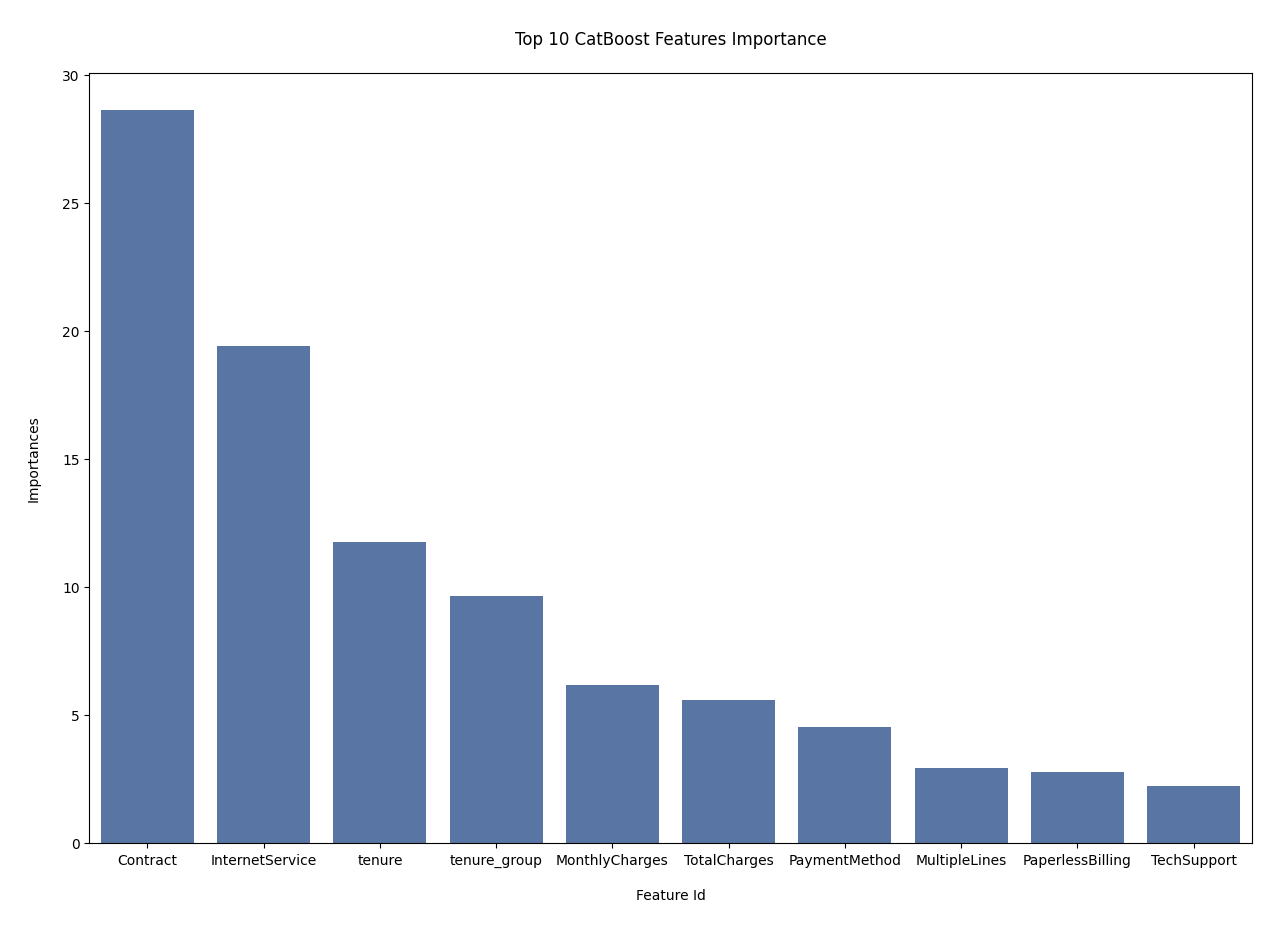

In [ ]:
print("Barplot of CatBoost Features and Importance :\n")
plt.figure(figsize=(15,10))
sns.barplot(x='Feature Id',
            y='Importances',
            data=feature_importance_df[:10])
plt.title('\nTop 10 CatBoost Features Importance\n')
plt.xlabel('\nFeature Id\n')
plt.ylabel('\nImportances\n')
plt.show()

### 6. XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [ ]:
one_hot_cols = pd.get_dummies(X_train).columns.tolist()
X_tr = pd.DataFrame(X_train_prepared, columns=one_hot_cols)
X_te = pd.DataFrame(X_test_prepared, columns=one_hot_cols)

In [ ]:
xgb = XGBClassifier(max_depth=5, learning_rate=0.1, objective='binary:logistic', n_jobs=-1)
xgb.fit(X_tr, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print('Accuracy of XGB Classifier on training set: {:.3f}'.
      format(xgb.score(X_tr, y_train)))
print('Accuracy of XGB Classifier on test set: {:.3f}'.
      format(xgb.score(X_te, y_test)))

Accuracy of XGB Classifier on training set: 0.849
Accuracy of XGB Classifier on test set: 0.817


In [ ]:
print('Cross-Validation Training Set Results:')
cv_model_scores(xgb, X_tr, y_train)
print('\n Cross Validation Test Set Results:')
cv_model_scores(xgb, X_te, y_test)

Cross-Validation Training Set Results:
      Avg CV AUC: 0.836
      Avg CV Acc: 0.793
Avg CV Precision: 0.640
   Avg CV Recall: 0.516

 Cross Validation Test Set Results:
      Avg CV AUC: 0.817
      Avg CV Acc: 0.791
Avg CV Precision: 0.625
   Avg CV Recall: 0.537


(0.8167499452782729,
 0.7906759906759907,
 0.6246769459580405,
 0.5366526414212249)

#### Hyperparamter Optimization

Now a function optimizer will be implemented by using Hyperopt aiming at identifying the hyperparamters that yield the lowest Logloss and highest Accuracy:

In [ ]:
# Setting up the space dictionary

space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),
         'nthread': hp.randint('nthread', 10),
         'eta': hp.uniform('eta', 0, 1.0) # learning rate
}

In [ ]:
def objective(params):
    params = {'max_depth': int(params['max_depth']),
              'nthread': params['nthread'],
              'eta': params['eta']}
    xgb_clf = XGBClassifier(**params)
    best_score = cross_val_score(xgb_clf, X_tr, y_train,
                                 scoring='accuracy', cv=5, n_jobs=-1).mean()
    loss = 1 - best_score
    return loss

In [ ]:
# Upgrade NumPy to the latest version
!pip install --upgrade numpy

# Now, import the necessary libraries and run the optimization
import numpy as np
from hyperopt import fmin, tpe, hp, Trials

# Define your objective function
def objective(x):
    return x ** 2  # Example function, replace it with your own

# Define the search space
space = hp.uniform('x', -10, 10)

# Set up the trials object
trials = Trials()

# Run the algorithm with the upgraded NumPy
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials,
            rstate=np.random.default_rng(24))  # Use default_rng

print("Best result:", best)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 2.1.1 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.1.1 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.1 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.1 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you ha

In [ ]:
# Assuming that 'best' is the result of some optimization process like hyperopt
# Use the get() method to provide default values if keys are missing
best_xgb = XGBClassifier(
    eta=best.get('eta', 0.1),  # Default value if 'eta' is missing
    max_depth=int(best.get('max_depth', 6)),  # Default value if 'max_depth' is missing
    nthread=best.get('nthread', 1)  # Default value if 'nthread' is missing
)

# Fit the model with the training data
best_xgb.fit(X_tr, y_train)

# Optionally, print the fitted model or results
print("Model fitted with best hyperparameters.")


Model fitted with best hyperparameters.


In [ ]:
best_xgb_tr_acc = best_xgb.score(X_tr, y_train)
best_xgb_te_acc = best_xgb.score(X_te, y_test)

print('Accuracy of XGB Classifier on training set: {:.3f}'.
      format(best_xgb_tr_acc))
print('Accuracy of XGB Classifier on test set: {:.3f}'.
      format(best_xgb_te_acc))

Accuracy of XGB Classifier on training set: 0.874
Accuracy of XGB Classifier on test set: 0.815


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold

def cv_model_scores(model, X, y):
    # Initialize cross-validation procedure
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Predict probabilities and class labels using cross-validation
    y_pred_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')
    y_pred_class = cross_val_predict(model, X, y, cv=cv, method='predict')

    # Calculate metrics
    auc = roc_auc_score(y, y_pred_proba[:, 1]) if len(set(y)) > 1 else None  # AUC is only defined for binary classification
    accuracy = accuracy_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class, average='weighted')
    recall = recall_score(y, y_pred_class, average='weighted')

    # Return the metrics as a tuple
    return auc, accuracy, precision, recall

# Example usage
print('Cross-Validation Training Set Results:')
try:
    xgb_tr_auc, xgb_tr_acc, xgb_tr_pre, xgb_tr_rec = cv_model_scores(best_xgb, X_tr, y_train)
    print(f'ROC AUC: {xgb_tr_auc:.3f}')
    print(f'Accuracy: {xgb_tr_acc:.3f}')
    print(f'Precision: {xgb_tr_pre:.3f}')
    print(f'Recall: {xgb_tr_rec:.3f}')
except TypeError as e:
    print(f'Error: {e}')

print('\nCross Validation Test Set Results:')
try:
    xgb_te_auc, xgb_te_acc, xgb_te_pre, xgb_te_rec = cv_model_scores(best_xgb, X_te, y_test)
    print(f'ROC AUC: {xgb_te_auc:.3f}')
    print(f'Accuracy: {xgb_te_acc:.3f}')
    print(f'Precision: {xgb_te_pre:.3f}')
    print(f'Recall: {xgb_te_rec:.3f}')
except TypeError as e:
    print(f'Error: {e}')


Cross-Validation Training Set Results:
ROC AUC: 0.833
Accuracy: 0.792
Precision: 0.782
Recall: 0.792

Cross Validation Test Set Results:
ROC AUC: 0.808
Accuracy: 0.780
Precision: 0.773
Recall: 0.780


Let's now take a look at XGBoost's interpretation of the most important features used in the model.

Feature Importance :



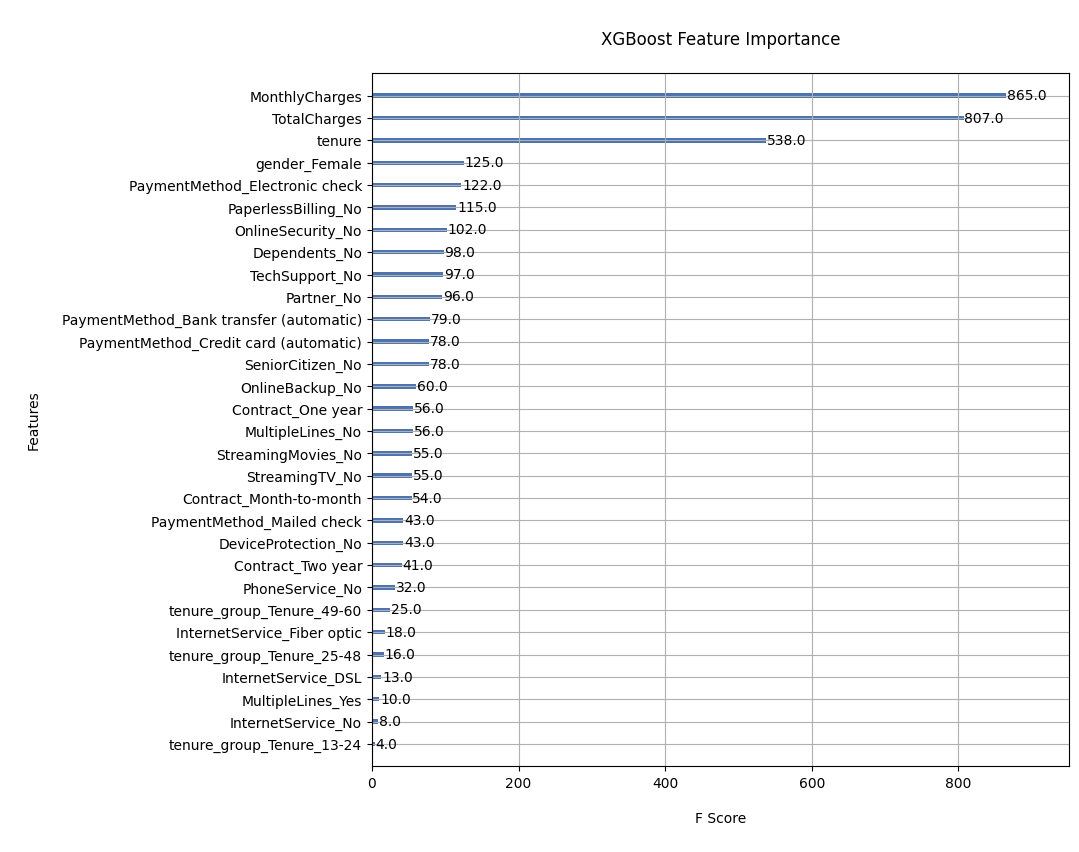

In [ ]:
print("Feature Importance :\n")
fig, ax = plt.subplots(figsize=(9,9))
plot_importance(best_xgb, ax=ax)
plt.xlabel('\nF Score\n')
plt.ylabel('\nFeatures\n')
plt.title('\nXGBoost Feature Importance\n')
plt.show()

We can see that according to our XGB model, the most important variables to predict churn rates are:

* Tenure
* Monthly Charges
* Total Charges

Let's have a look at the confusion matrix:

[[3611  258]
 [ 406  999]]


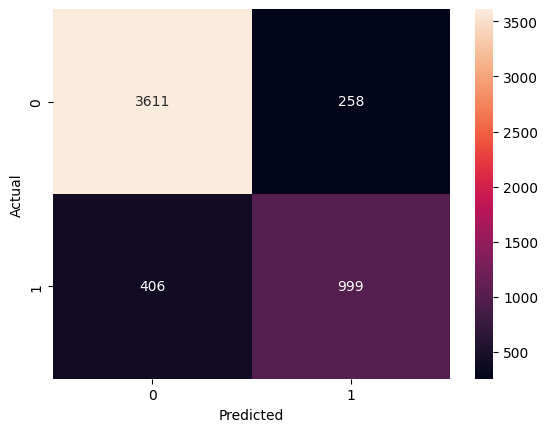

In [ ]:
y_pred = best_xgb.predict(X_tr)
conf_mat = confusion_matrix(y_train, y_pred)
print(conf_mat)
confusion_matrix_ = pd.crosstab(y_train, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_, annot=True, fmt="d")
plt.show()

[[1153  141]
 [ 184  280]]


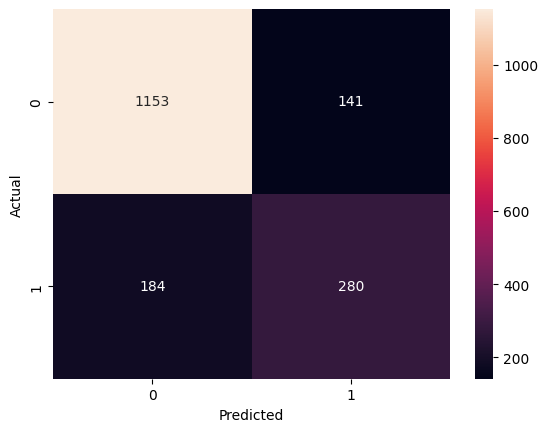

In [ ]:
y_pred_te = best_xgb.predict(X_te)
conf_mat_te = confusion_matrix(y_test, y_pred_te)
print(conf_mat_te)
confusion_matrix_te = pd.crosstab(y_test, y_pred_te, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_te, annot=True, fmt="d")
plt.show()

### Final Results

In [ ]:
index_=['Naiva Bayes',
        'Logistic Regression',
        'Random Forest (Random Grid Search)',
        'Support Vector Machine',
        'CatBoost (HyperOpt)',
        'XGBoost (HyperOpt)']

all_models = {'Training Accuracy':np.round([nbm_tr_acc,
                                            lgm_tr_acc,
                                            rfm_tr_acc,
                                            svm_tr_acc,
                                            cbm_best_accuracy_train,
                                            best_xgb_tr_acc], 3),
              'Test Accuracy':np.round([nbm_te_acc,
                                        lgm_te_acc,
                                        rfm_te_acc,
                                        svm_te_acc,
                                        cbm_best_accuracy_test,
                                        best_xgb_te_acc],3),
              'Training AUC':np.round([nbm_tr_auc,
                                       lgm_tr_auc,
                                       rfm_tr_acc,
                                       svm_tr_auc,
                                       cbm_best_auc_train,
                                       xgb_tr_auc], 3),
              'Test AUC':np.round([nbm_te_auc,
                                   lgm_te_auc,
                                   rfm_te_auc,
                                   svm_te_auc,
                                   cbm_best_auc_test,
                                   xgb_te_auc],3)

}

In [ ]:
final_results_df = pd.DataFrame(data=all_models, index=index_)
final_results_df.sort_values(by='Test Accuracy', ascending=False)

,Training Accuracy,Test Accuracy,Training AUC,Test AUC
CatBoost (HyperOpt),0.810,0.816,0.929,0.852
XGBoost (HyperOpt),0.874,0.815,0.833,0.808
Logistic Regression,0.804,0.796,0.846,0.836
Support Vector Machine,0.795,0.795,0.830,0.817
Random Forest (Random Grid Search),0.780,0.794,0.780,0.822
Naiva Bayes,0.747,0.743,0.831,0.824


## 7. Conclusion

We can see that in terms of 'Accuracy' both the CatBoost and XGBoost performed well (as expected). However, looking at the AUC figures, we can see that the CatBoost algorithm overfitted quite a lot. Thus, the selected algorithm to predict customers likely to Churn, for this particular work, is the HyperOpt optimized XGBoost algorithm.

Finally, the best way to use this model is assigning Churn Probability for each customer and build strategies on top of that. To get the churn probability from our model, the code below can be used.

In [ ]:
best_xgb.predict_proba(X_tr)[:,1]

array([0.6168986 , 0.19419217, 0.01249753, ..., 0.44634733, 0.69209045,
       0.00915916], dtype=float32)